In [1]:
import os
os.chdir(os.getcwd()+"/src")
print(os.getcwd())

FileNotFoundError: [Errno 2] No such file or directory: '/media/james/Shared/neutrino/SN_Localization/src/src'

In [1]:
import ROOT
from ROOT import *
import numpy as np
from scipy.spatial.transform import Rotation
import ctypes
from constants import *
from tqdm import trange

from array import array

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.22/06


In [2]:
ROOT.gRandom.SetSeed(0)
ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetMarkerStyle(kPlus)
rng = ROOT.TRandom3()

## Read in double differential xscn file

In [1]:
path = '../data/ibd/ibdxscnDoubleDiff.txt'
xscn = TH2F("ibd_double_diff_xscn", "IBD Double Differential Cross Section", 200, 0.5, 200.5, 20, -1, 1)
xscn_file = np.loadtxt(path, delimiter=" ")

for line in xscn_file:
    energy = line[0]
    for i in range(1, line.size):
        angle = -0.95 + 0.1*(i-1) # center of the bin
        xscn.Fill(energy, angle, line[i])


NameError: name 'TH2F' is not defined

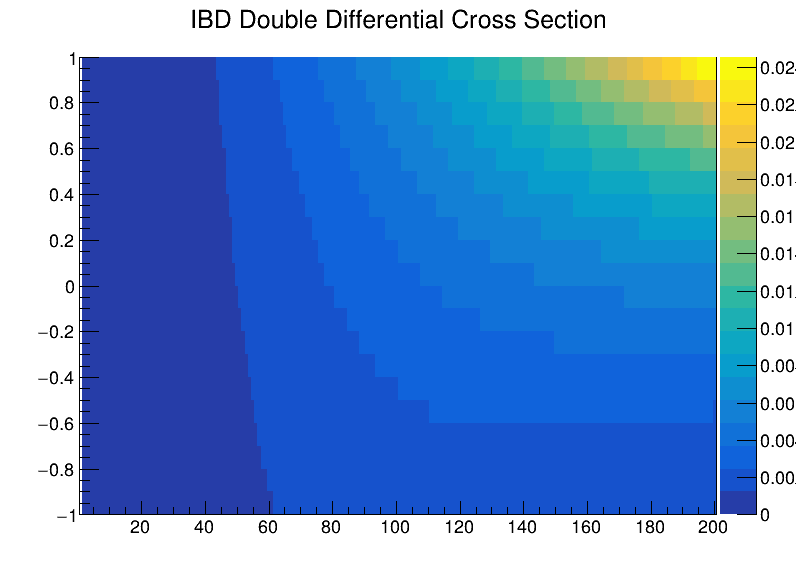

In [4]:
c1 = TCanvas("c1", "c1", 800, 600)
prof_x = xscn.ProfileX()
#prof_x.Draw()
xscn.Draw("colz")
c1.Draw()

In [5]:
def get_e_angle(nu_energy):
    nbin = xscn.GetXaxis().FindBin(nu_energy)
    py = xscn.ProjectionY("projection_y", nbin, nbin)
    ret = py.GetRandom()
    py.Delete()
    return ret

In [8]:
from particle import *
from ibd_event import *

%autoreload 2

out_path = "../output/ROOT/kin_results_generated.root"
outfile = TFile(out_path, "recreate", "Energy Angular Distribution")
tree = TTree("kin_tree","kin file tree")

NUMGEN = 1000000

#set up tree
nuebar_energy = array('f', [0.])
ebar_energy = array('f', [0.])
n_energy = array('f', [0.])
ex = array('f', [0.])
ey = array('f', [0.])
ez = array('f', [0.])
nx = array('f', [0.])
ny = array('f', [0.])
nz = array('f', [0.])
ar_dir = np.array([0, 0, -1])
tree.Branch("nuebar_energy", nuebar_energy, "nuebar_energy/F")
tree.Branch("ebar_energy", ebar_energy, "ebar_energy/F")
tree.Branch("n_energy", n_energy, "n_energy/F")

tree.Branch("ex", ex, "ex/F")
tree.Branch("ey", ey, "ey/F")
tree.Branch("ez", ez, "ez/F")

tree.Branch("nx", nx, "nx/F")
tree.Branch("ny", ny, "ny/F")
tree.Branch("nz", nz, "nz/F")


nuebar_dir = np.array([0, 0, -1])
for i in trange(NUMGEN):
    event = IBD_event(rng.Uniform(98)+2, nuebar_dir, get_e_angle)
    nuebar_energy[0] = event.nuebar.en
    ebar_energy[0] = event.ebar.en
    n_energy[0] = event.n.en

    ex[0] = event.ebar.dir[0]
    ey[0] = event.ebar.dir[1]
    ez[0] = event.ebar.dir[2]

    nx[0] = event.n.dir[0]
    ny[0] = event.n.dir[1]
    nz[0] = event.n.dir[2]
    tree.Fill()
print("done!")
tree.Write()
#outfile.Close()
    


100%|██████████| 1000000/1000000 [02:35<00:00, 6429.30it/s]

done!


10118

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


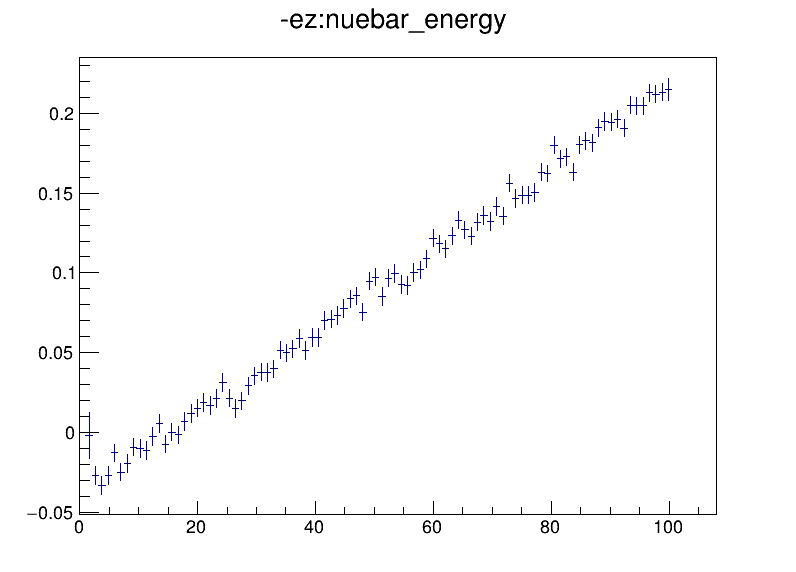

In [9]:
c1 = TCanvas("c1", "c1", 800, 600)
tree.Draw("-ez:nuebar_energy", "", "prof")
c1.Draw()

In [10]:
outfile.Close()

## Precision
SOme precision checks are shown below. conservation of moomentum holds up to $\pm 0.05 MeV/C$

In [14]:
event = IBD_event(20., [0., 0., 1.], get_e_angle)

25.319103322280803
25.309245392779832


In [19]:
print(event.nuebar.getMomentum())
print(event.n.getMomentum())
print(event.ebar.getMomentum()*event.ebar.dir[2])
print(25.309245392779832*event.n.dir[2] + event.ebar.getMomentum()*event.ebar.dir[2])

20.0
25.319103322280803
2.412196434260206
20.0


In [25]:
print(event.ebar.en**2)
print(event.ebar.getMomentum()**2 + e0_e**2)

337.3068807223555
337.3068807223555


In [15]:
for i in trange(100000):
    pass

100%|██████████| 100000/100000 [00:00<00:00, 4593577.78it/s]
